### Getting Data

In [2]:
!pip install numpy pandas matplotlib seaborn --quiet

In [3]:
!pip install opendatasets graphviz scikit-learn plotly --upgrade --quiet

In [4]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')
%matplotlib inline

In [6]:
iris_df = sns.load_dataset('iris')

In [7]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


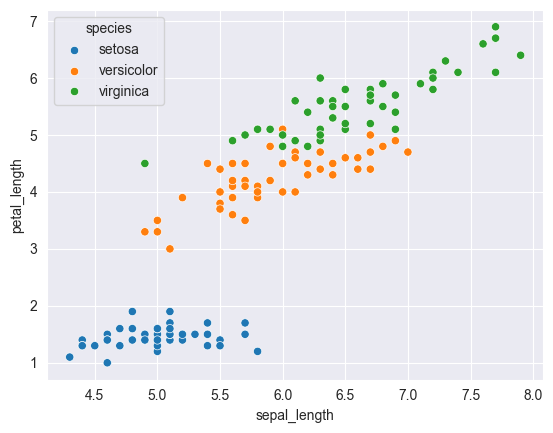

In [8]:
sns.scatterplot(iris_df, x='sepal_length', y='petal_length', hue='species')
plt.show()

In [9]:
numeric_cols = ['sepal_length','sepal_width','petal_length', 'petal_width']
X = iris_df[numeric_cols]

### Implementing K-Means

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=3, random_state=42)

In [13]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [14]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [15]:
predictions = model.predict(X)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

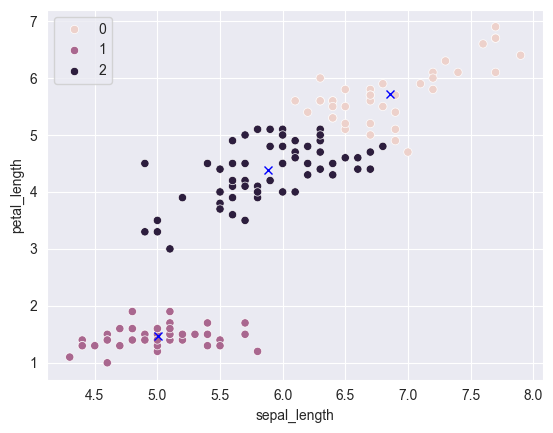

In [16]:
sns.scatterplot(iris_df, x='sepal_length', y='petal_length', hue=predictions)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')
plt.show()

In [17]:
model.inertia_

78.85566582597727

In [18]:
model2= KMeans(n_clusters=6, random_state=42)
model2.fit(X)

KMeans(n_clusters=6, random_state=42)

In [19]:
preds = model2.predict(X)
preds

array([1, 5, 5, 5, 1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 5, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0])

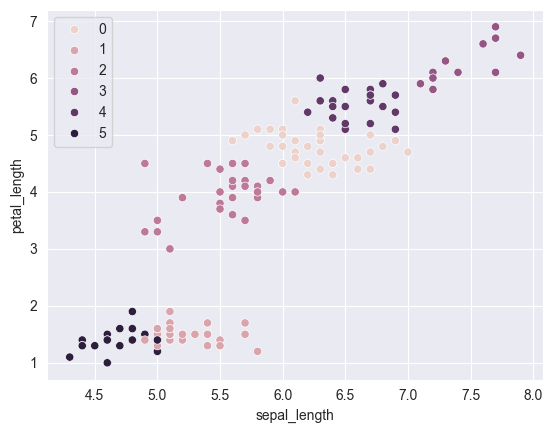

In [20]:
sns.scatterplot(X, x='sepal_length', y='petal_length', hue=preds)
plt.show()

In [21]:
model.inertia_

78.85566582597727

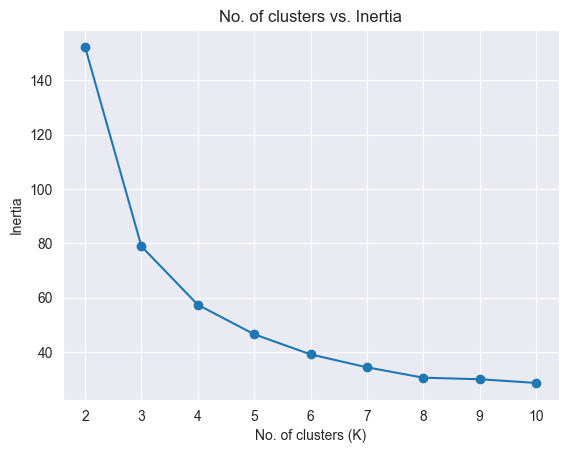

In [22]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');
plt.show()

### Implementing DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
model3 = DBSCAN(eps=1.1, min_samples=4).fit(X)

In [26]:
model3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

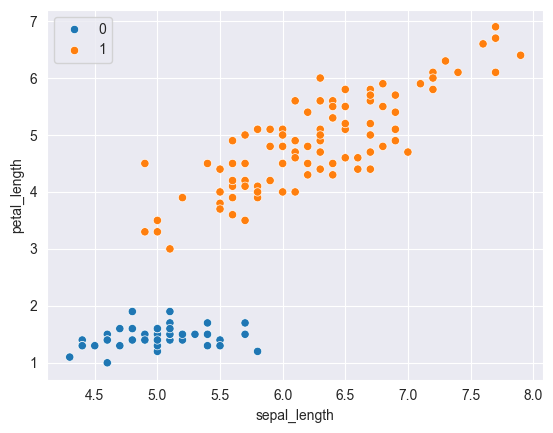

In [27]:
sns.scatterplot(X, x='sepal_length', y='petal_length', hue=model3.labels_)
plt.show()

In [28]:
def DB(e,minsamp):
    model3= DBSCAN(eps=e,min_samples=minsamp).fit(X)
    sns.scatterplot(X, x='sepal_length', y='petal_length', hue=model3.labels_)
    plt.show()
    print(model3.labels_)

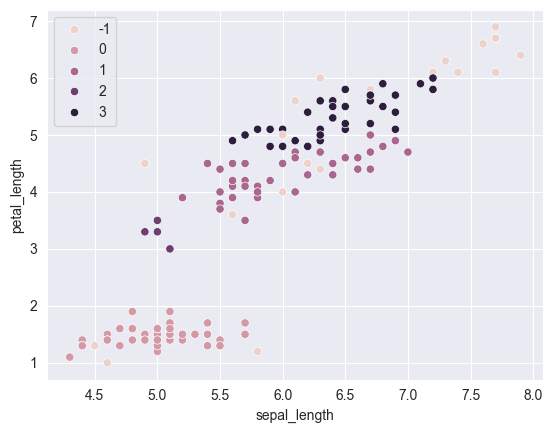

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1 -1  1 -1  1  1  1 -1  1  3  1
  3  1  1  1  1  1  1  1  1  1  1  3  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1 -1  3  3  3  3 -1 -1 -1 -1 -1  3  3  3  3 -1  3  3 -1 -1 -1
  3  3 -1  3  3  3  3  3  3  3 -1 -1  3  3 -1 -1  3  3  3  3  3  3  3  3
  3  3  3  3  3  3]


In [29]:
DB(0.4,3)

### Applying Principal Component Analysis

In [60]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [62]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=2)
pca.fit(iris_df[numeric_cols])

PCA(n_components=2)

In [72]:
transformed= pca.transform(iris_df[numeric_cols])
transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

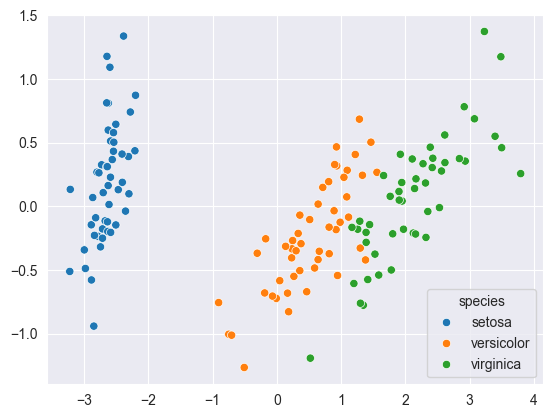

In [74]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species'])
plt.show()